2301/2301 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step


C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     29505
           1       0.50      1.00      0.67     36738
           2       0.00      0.00      0.00      7370

    accuracy                           0.50     73613
   macro avg       0.17      0.33      0.22     73613
weighted avg       0.25      0.50      0.33     73613



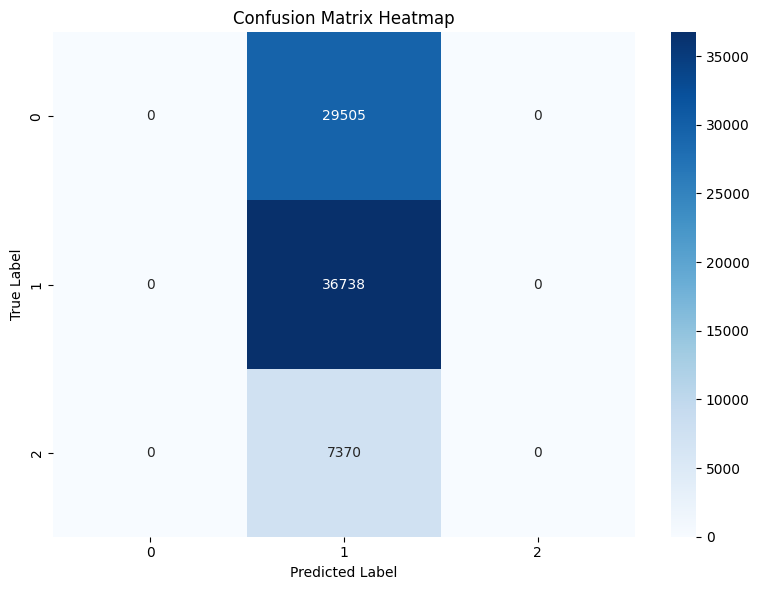

✅ Evaluation complete. Reports and results saved.


In [1]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 🔄 Load and encode data
df = pd.read_csv(r"C:\Users\sagni\Downloads\CrowdAssist\cleaned_data.csv")
label_encoders = {}

for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Label column specifically
le_label = LabelEncoder()
df['Label'] = le_label.fit_transform(df['Label'])
label_encoders['Label'] = le_label

# 🎯 Split
X = df.drop('Label', axis=1)
y = df['Label']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# 🤖 Load model
model = load_model(r"C:\Users\sagni\Downloads\CrowdAssist\emergency_routing_model.h5")

# 🔮 Predict
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)

# 🧾 Classification Report
target_names = le_label.inverse_transform(sorted(np.unique(y_test)))
report = classification_report(y_test, y_pred, target_names=target_names.astype(str))
cm = confusion_matrix(y_test, y_pred)

print("Classification Report:\n", report)

# 💾 Save report
with open(r"C:\Users\sagni\Downloads\CrowdAssist\keras_evaluation_report.txt", "w") as f:
    f.write("Classification Report:\n")
    f.write(report)
    f.write("\nConfusion Matrix:\n")
    f.write(str(cm))

# 💾 Save predictions
pred_df = pd.DataFrame({
    'True_Label': le_label.inverse_transform(y_test),
    'Predicted_Label': le_label.inverse_transform(y_pred),
    'Probabilities': list(y_prob)
})
pred_df.to_csv(r"C:\Users\sagni\Downloads\CrowdAssist\prediction_results.csv", index=False)

# 🔥 Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

print("✅ Evaluation complete. Reports and results saved.")
